## Carregando biblioteca e os dados:

In [1]:
#imports bibliotecas príncipais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importando bibliotecas do statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [3]:
#imports secundaríos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#configurando pandas
pd.options.display.max_columns = 90

In [5]:
#lendo base de dados
dados = pd.read_csv('base.csv')
dados.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Análise Descritiva

In [6]:
#imprimindo informações da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

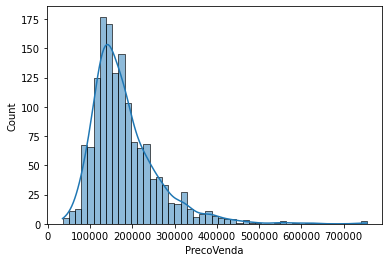

In [7]:
#Verificando distribuição da váriavel targert
sns.histplot(data = dados, x='PrecoVenda', kde=True);

In [8]:
#contando valores ausentes
dados.isnull().sum().sort_values().tail(20)

Servicos                 0
InstalacaoEletrica       1
TipoAlvenaria            8
AreaAlvenaria            8
AlturaPorao             37
CondicaoPorao           37
TipoAcabPorao1          37
TipoAcabPorao2          38
ParedePorao             38
QualidadeGaragem        81
AcabamentoGaragem       81
AnoGaragem              81
LocalGaragem            81
CondicaoGaragem         81
Fachada                259
QualdiadeLareira       690
QualidadeCerca        1179
Beco                  1369
Outros                1406
QualidadePiscina      1453
dtype: int64

## Tratamento dos dados

In [9]:
#Dropando Valores Ausentes.
dataset = dados.drop(['QualdiadeLareira', 'QualidadeCerca', 'Beco', 'Outros', 'QualidadePiscina', 'Id'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   FormaProp             1460 non-null   object 
 6   PlanoProp             1460 non-null   object 
 7   Servicos              1460 non-null   object 
 8   ConfigLote            1460 non-null   object 
 9   InclinacaoLote        1460 non-null   object 
 10  Bairro                1460 non-null   object 
 11  Estrada1              1460 non-null   object 
 12  Estrada2              1460 non-null   object 
 13  TipoHabitacao         1460 non-null   object 
 14  EstiloHabitacao       1460 non-null   object 
 15  Qualidade            

In [10]:
#criando loop para mudar as variaveis object para category
for i in dataset.select_dtypes(include='object'):
    dataset[i] = dataset[i].astype('category')

In [11]:
#verificando
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ClasseImovel          1460 non-null   int64   
 1   ClasseZona            1460 non-null   category
 2   Fachada               1201 non-null   float64 
 3   TamanhoLote           1460 non-null   int64   
 4   Rua                   1460 non-null   category
 5   FormaProp             1460 non-null   category
 6   PlanoProp             1460 non-null   category
 7   Servicos              1460 non-null   category
 8   ConfigLote            1460 non-null   category
 9   InclinacaoLote        1460 non-null   category
 10  Bairro                1460 non-null   category
 11  Estrada1              1460 non-null   category
 12  Estrada2              1460 non-null   category
 13  TipoHabitacao         1460 non-null   category
 14  EstiloHabitacao       1460 non-null   category
 15  Qual

In [12]:
#salvando uma 
target = dataset['PrecoVenda'].copy()
num_var = dataset.select_dtypes(include=['int', 'float']).copy()
cat_var = dataset.select_dtypes(include=['category']).copy()

In [13]:
num_var.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.99])

,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,1

In [14]:
#Verificando quantidade de valores nas features categoricas
cat_var.nunique().sort_values(ascending=False)

Bairro                  25
Exterior2               16
Exterior1               15
TipoVenda                9
Estrada1                 9
Estrada2                 8
EstiloHabitacao          8
MaterialTelhado          8
Funcionalidade           7
TipoFundacao             6
LocalGaragem             6
Aquecimento              6
TipoAcabPorao2           6
TipoAcabPorao1           6
CondicaoVenda            6
TipoTelhado              6
TipoHabitacao            5
CondicaoGaragem          5
QualidadeGaragem         5
InstalacaoEletrica       5
ConfigLote               5
QualidadeAquecimento     5
CondicaoExterna          5
ClasseZona               5
ParedePorao              4
CondicaoPorao            4
AlturaPorao              4
TipoAlvenaria            4
QualidadeCozinha         4
PlanoProp                4
QualidadeCobertura       4
FormaProp                4
InclinacaoLote           3
AcabamentoGaragem        3
EntradaPavimentada       3
ArCentral                2
Rua                      2
S

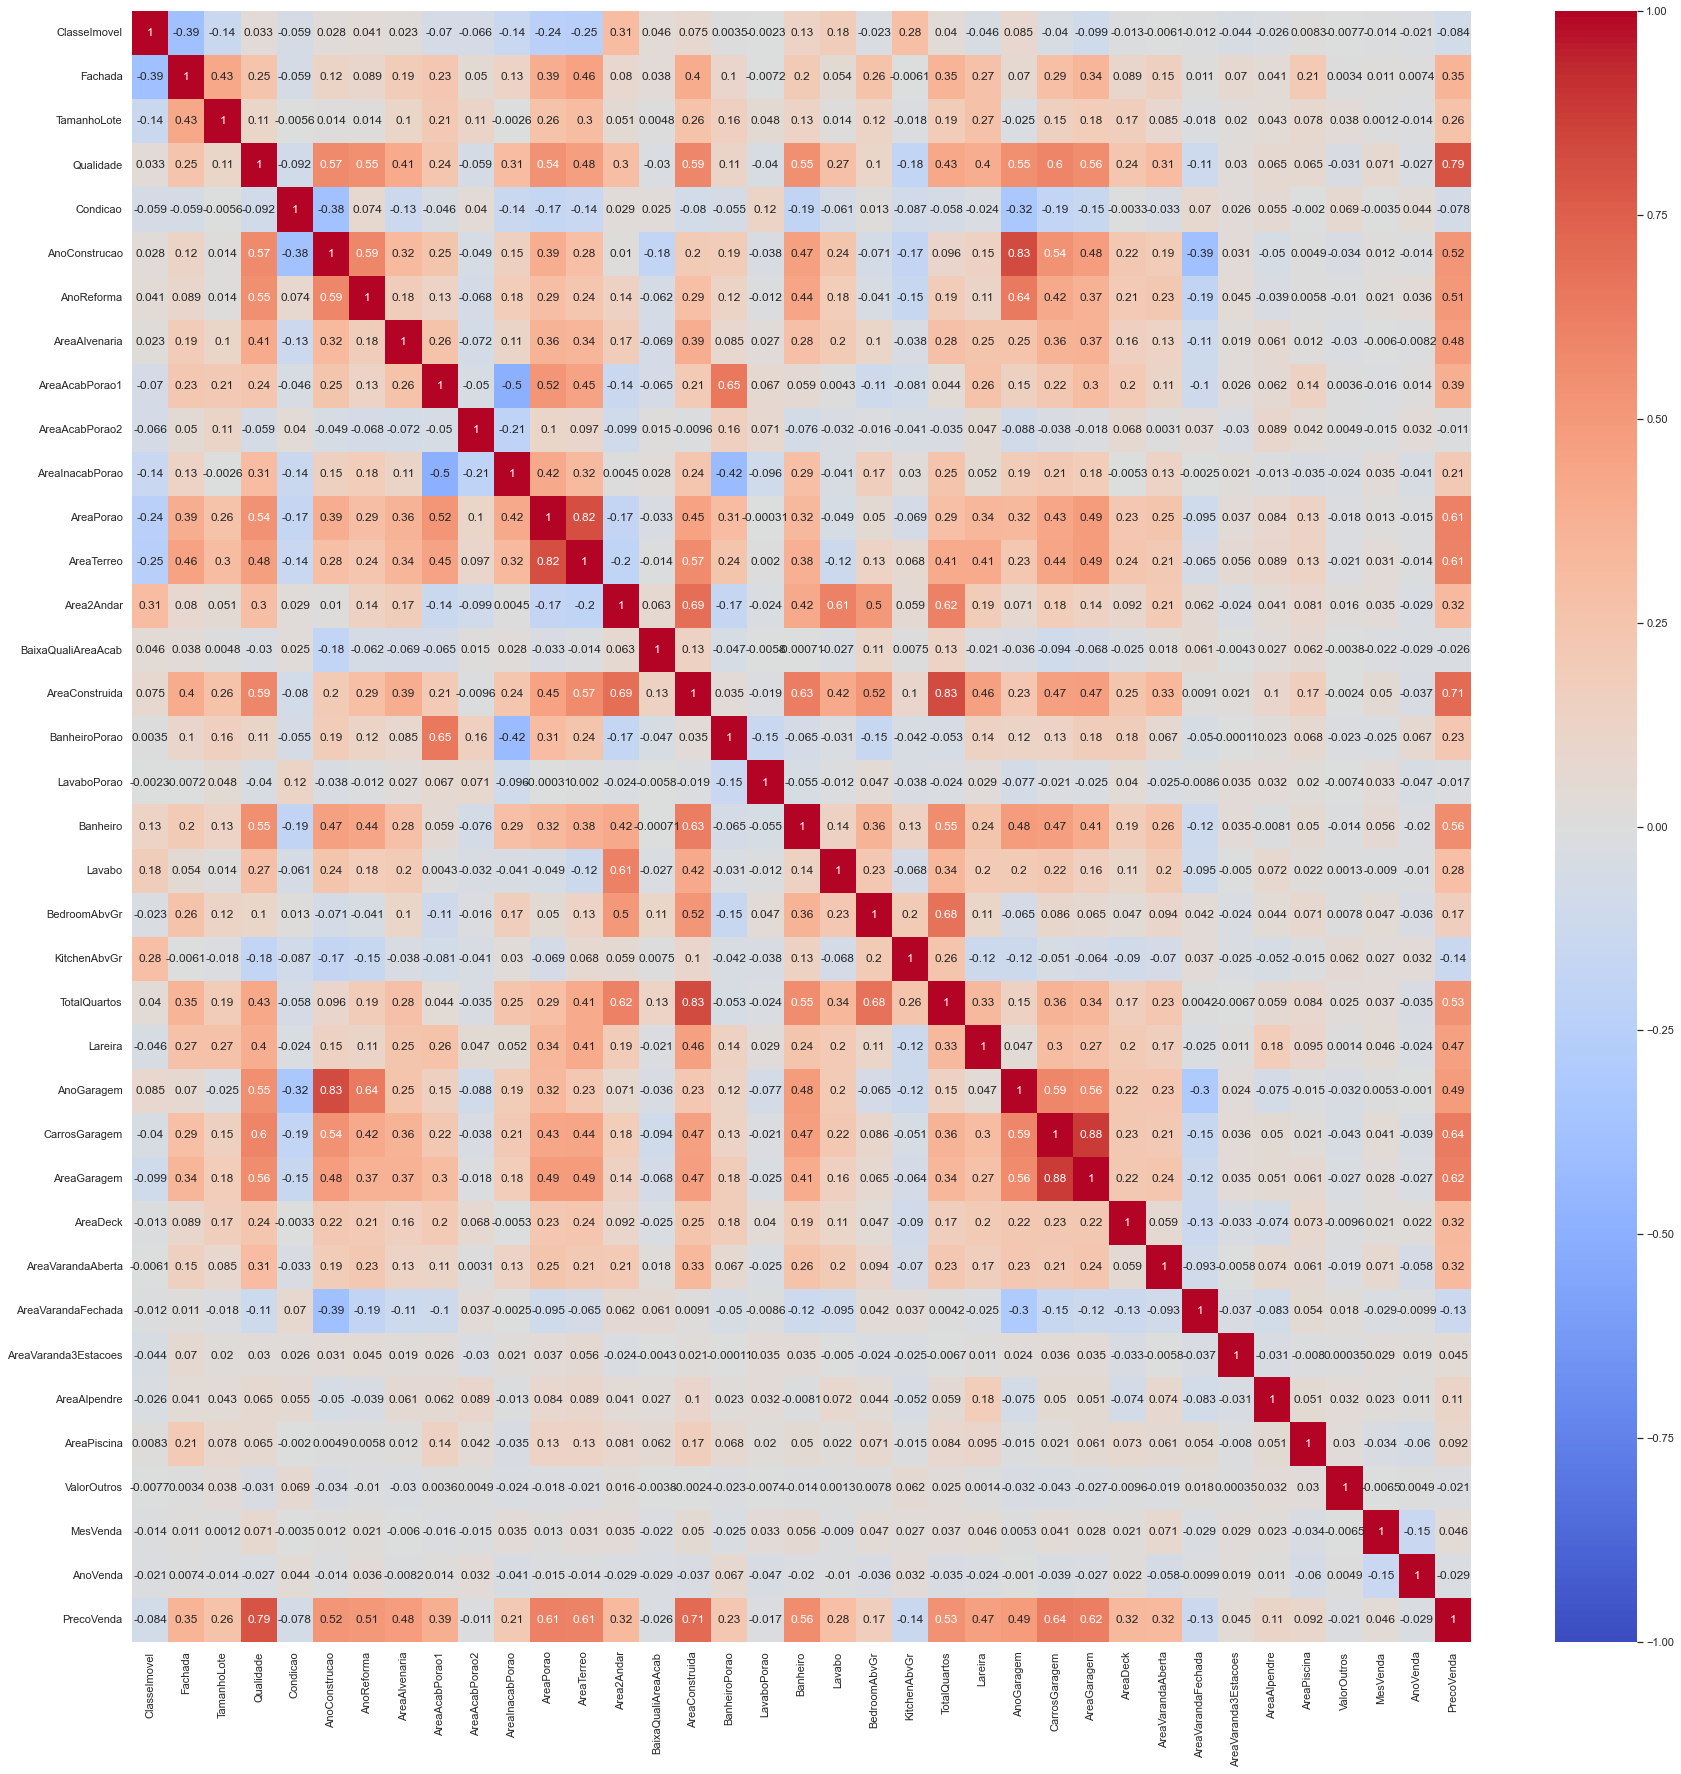

In [15]:
#plotando matriz de correlação entre as váriaveis numéricas com as váriaveis target.
sns.set(rc = {'figure.figsize': (30,30)})
sns.heatmap(data=num_var.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm');

In [16]:
sns.set(rc = {'figure.figsize': (8,8)})

In [17]:
#função para plotar boxplot da variavel target com features
def plot(var):
    sns.boxplot(data=dataset, x = var, y='PrecoVenda')

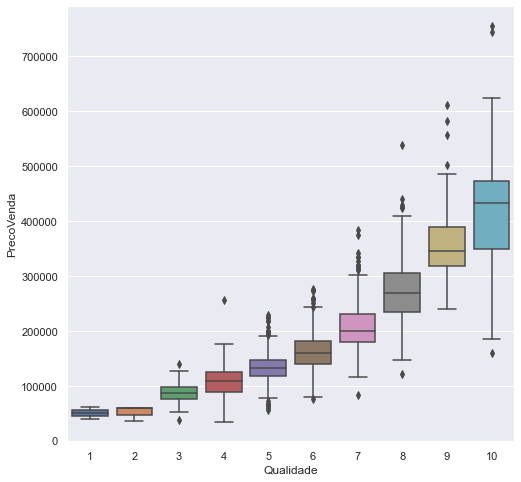

In [18]:
#precovenda x qualidade
plot('Qualidade')

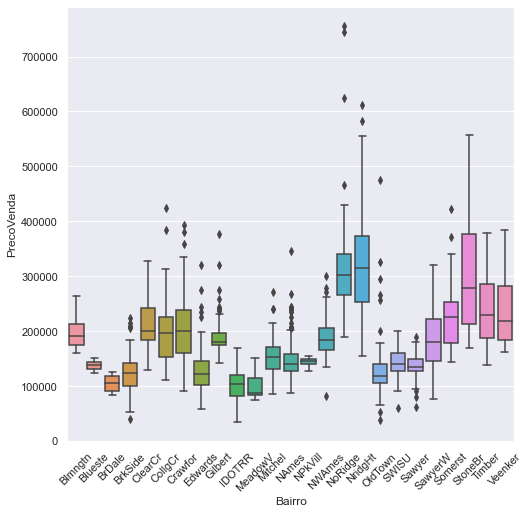

In [19]:
#precovenda x bairro
plot('Bairro')
plt.xticks(rotation=45)
plt.show()

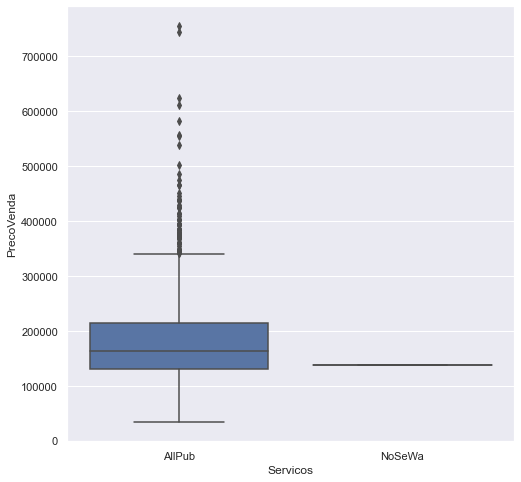

In [20]:
#precovenda x servicos
plot('Servicos')

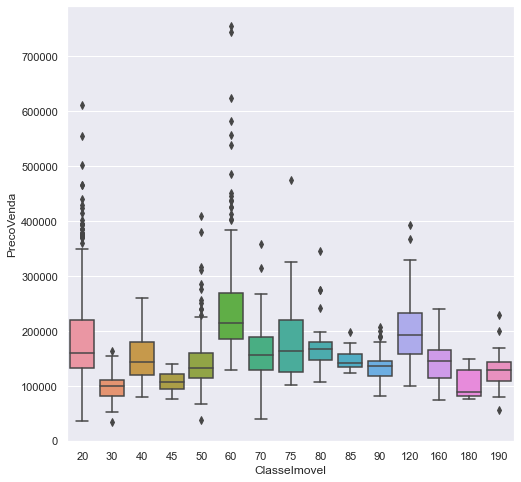

In [21]:
#precovenda x classe imovel
plot('ClasseImovel')

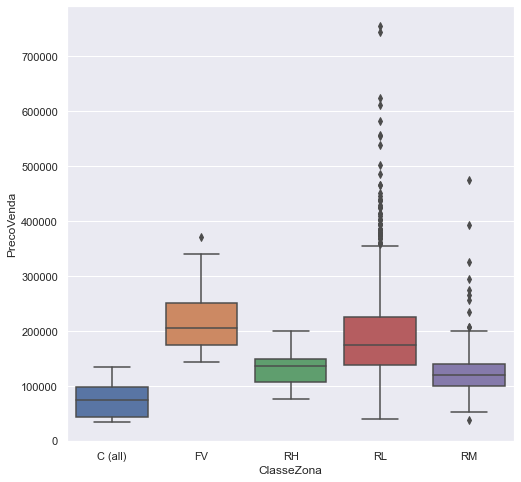

In [22]:
#precovenda x classezona
plot('ClasseZona')

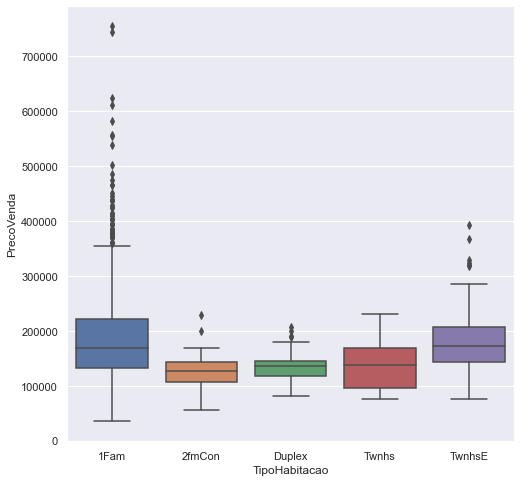

In [23]:
#precovenda x tipohabitacao
plot('TipoHabitacao')

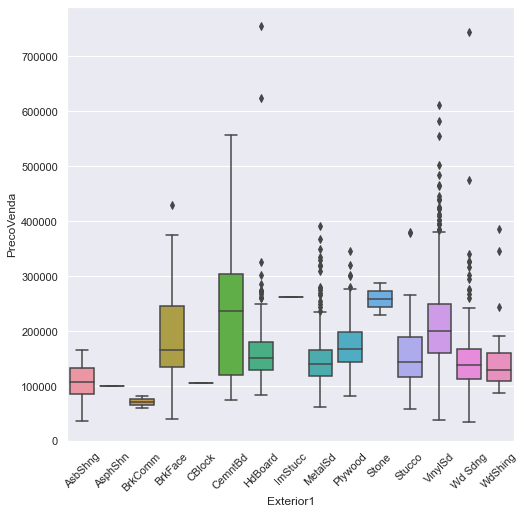

In [24]:
#precovenda x exterior1
plot('Exterior1')
plt.xticks(rotation=45)
plt.show()

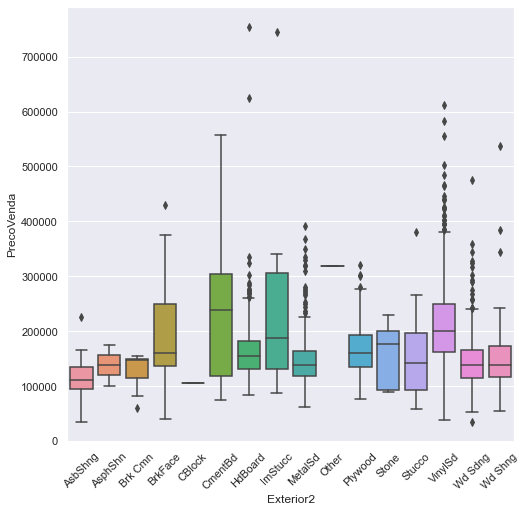

In [25]:
#precovenda x exterior2
plot('Exterior2')
plt.xticks(rotation=45)
plt.show()

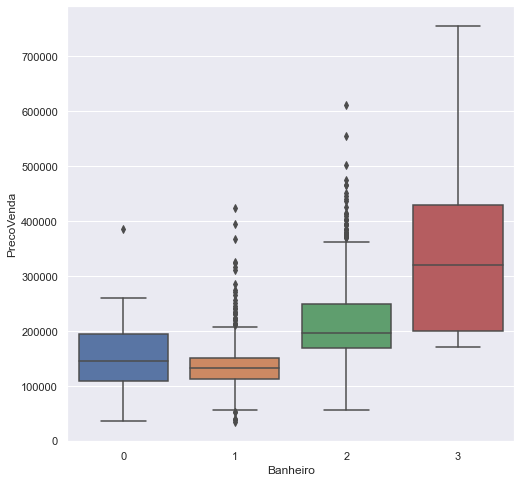

In [26]:
#precovenda x banheiro
plot('Banheiro')

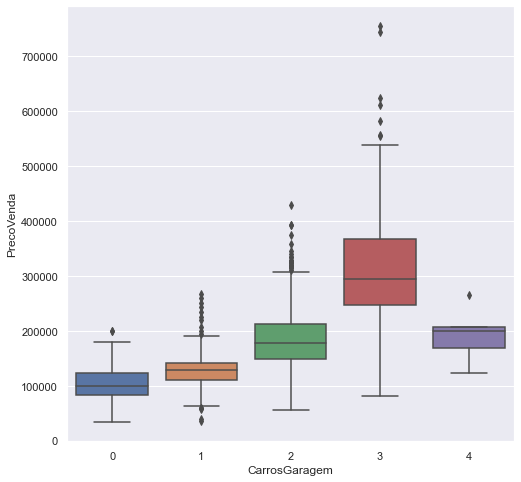

In [27]:
#precovenda x carrosgaragem
plot('CarrosGaragem')

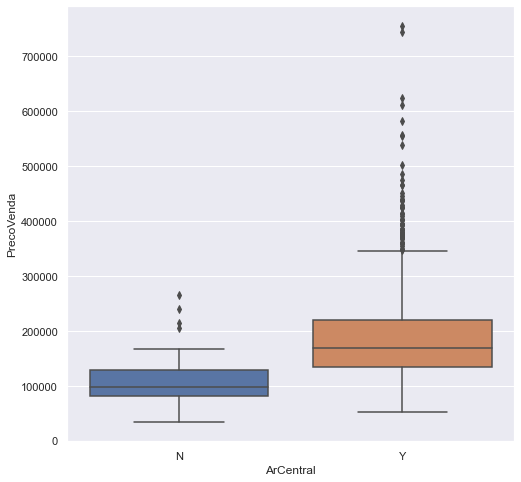

In [28]:
#precovenda x arcentral
plot('ArCentral')

In [29]:
#funçao para gerar scatterplot das features numericas x precovenda
def scatter(var):
    sns.scatterplot(data=dataset, x=var, y='PrecoVenda')

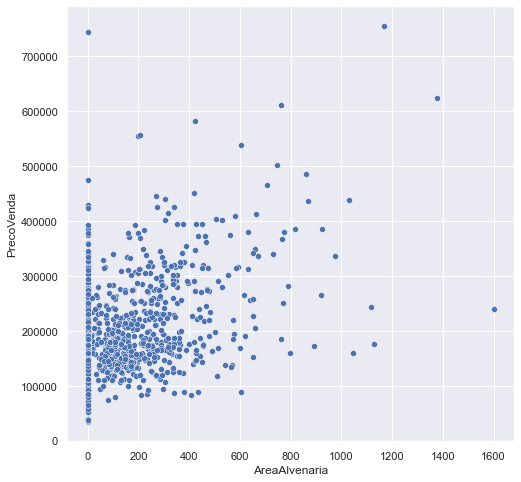

In [30]:
#precovenda x areaalvenaria
scatter('AreaAlvenaria')

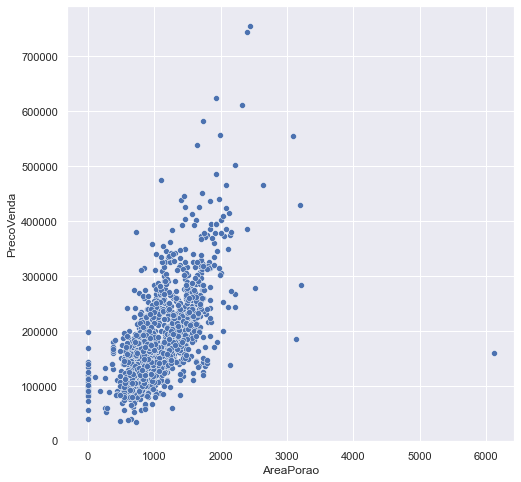

In [31]:
#precovenda x areaporao
scatter('AreaPorao')

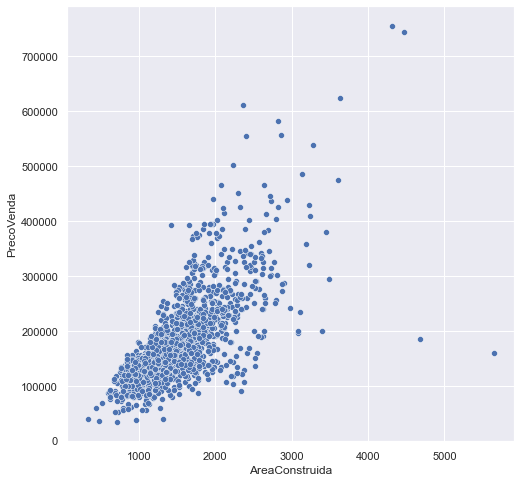

In [32]:
#precovenda x areaconstruida
scatter('AreaConstruida')

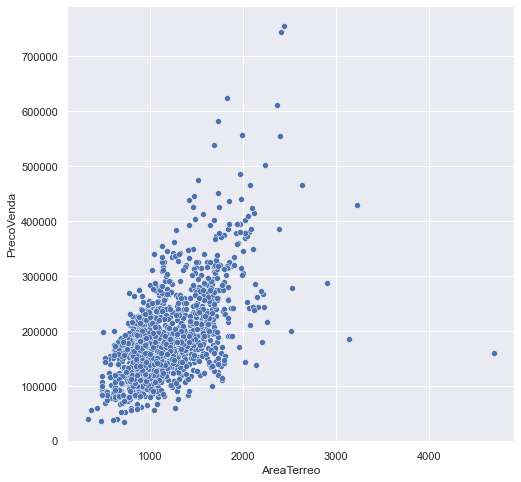

In [33]:
#precovenda x areaterreo
scatter('AreaTerreo')

## Criando algumas features:

In [34]:
#Divisão da area por comodos:
dataset['AreaComodos'] = round(dataset['AreaConstruida'] / dataset['TotalQuartos'], 2)
dataset['AreaComodos'].head()

0    213.75
1    210.33
2    297.67
3    245.29
4    244.22
Name: AreaComodos, dtype: float64

In [35]:
#diferença entre área tamnho do lote e área construida
dataset['DifLoteArea'] = dataset['TamanhoLote'] - dataset['AreaConstruida']
dataset['DifLoteArea'].head()

0     6740
1     8338
2     9464
3     7833
4    12062
Name: DifLoteArea, dtype: int64

In [36]:
#aplicando transformação logarítmica em PrecoVenda
dataset['precovenda_log'] = np.log(dataset['PrecoVenda'])
dataset.head()

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,AreaComodos,DifLoteArea,precovenda_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,213.75,6740,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,210.33,8338,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,297.67,9464,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,245.29,7833,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,244.22,12062,12.429216


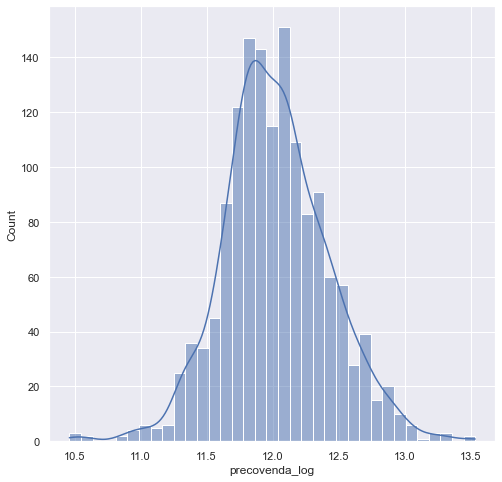

In [37]:
#plot para ver distribuição da variavel precovenda aplicando transformação logaritimica
sns.histplot(data=dataset, x='precovenda_log', kde='True');

In [38]:
#filtrando as linhas onde a condição de venda era normal
dbfiltro = dataset[(dataset.CondicaoVenda == 'Normal')]
dbfiltro.head()

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,AreaComodos,DifLoteArea,precovenda_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,213.75,6740,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,210.33,8338,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,297.67,9464,12.317167
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,244.22,12062,12.429216
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,272.40,12753,11.870600


## Regressão Linear Para interpretabilidade:

In [39]:
#criando outro database recebendo as features preditoras
db_aux = dbfiltro[['AreaConstruida', 'Qualidade', 'CarrosGaragem', 'Banheiro', 'ArCentral','precovenda_log','AreaPorao']].dropna().copy()

In [40]:
#aplicando onehotencoding com pandas na coluna arcentral
db_aux = pd.get_dummies(db_aux, columns=['ArCentral'], drop_first=True)

In [42]:
#plotando uma regração linear entre as váriaveis de precovendalog e as features preditora
modelo = smf.ols(formula = 'precovenda_log ~ + Qualidade + AreaConstruida + CarrosGaragem + Banheiro+ ArCentral_Y + AreaPorao',data=db_aux).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         precovenda_log   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1139.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:56:42   Log-Likelihood:                 644.77
No. Observations:                1198   AIC:                            -1276.
Df Residuals:                    1191   BIC:                            -1240.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4485      0.022    466.

In [43]:
#calculando o vif que demonstra o nível de correlação entre as váriaveis
vif = pd.DataFrame()
vif['feature'] = db_aux.columns
vif["VIF"] = [variance_inflation_factor(db_aux.values, i)
                          for i in range(len(db_aux.columns))]
print(vif)

          feature        VIF
0  AreaConstruida  20.886280
1       Qualidade  47.209660
2   CarrosGaragem  11.133922
3        Banheiro  17.396892
4  precovenda_log  39.424600
5       AreaPorao  10.520197
6     ArCentral_Y  16.939894


<AxesSubplot:xlabel='AreaConstruida'>

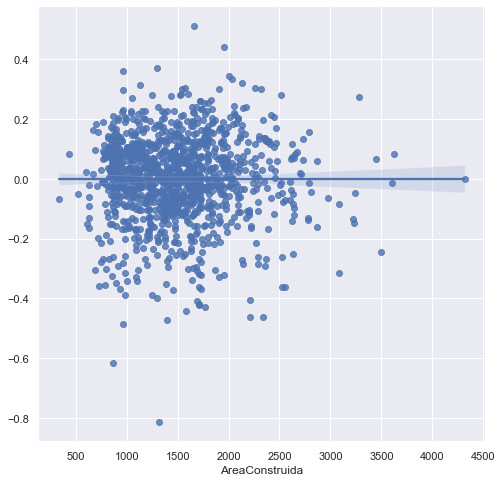

In [44]:
#plotando os redidos do modelo
sns.regplot(x=db_aux.AreaConstruida , y=modelo.resid)

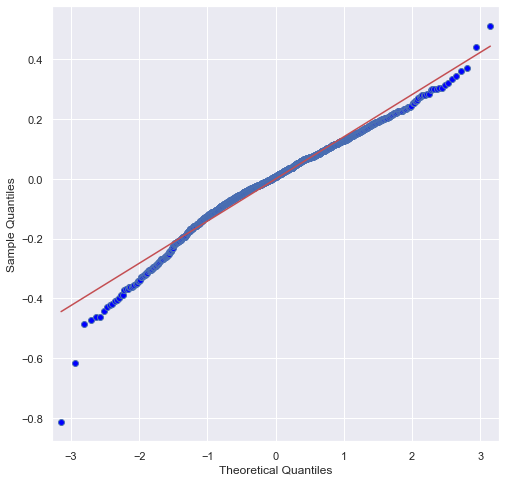

In [45]:
#plotrando a acertividade do modelo
sm.qqplot(modelo.resid, line="s");

<AxesSubplot:ylabel='Count'>

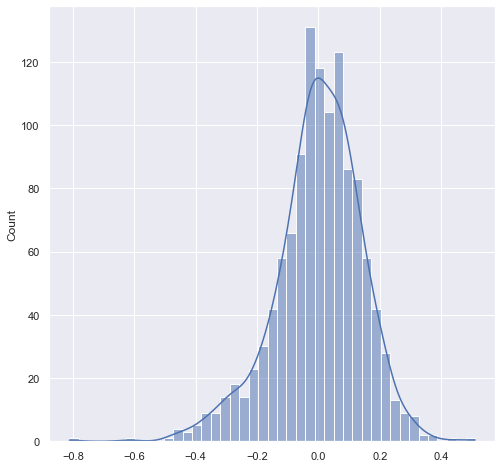

In [47]:
#plotando a distribuição dos residos
sns.histplot(modelo.resid, kde=True)

In [48]:
#calculando o valor que as váriaveis preditoras representam o valor da variavel target
round((np.exp(modelo.params[1:]) - 1)*100, 2)

Qualidade         10.58
AreaConstruida     0.02
CarrosGaragem      9.41
Banheiro           1.56
ArCentral_Y       24.58
AreaPorao          0.02
dtype: float64